<a href="https://colab.research.google.com/github/sime1/notebooks/blob/master/regression_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression trees

In questo notebook ho provato ad utilizzare i decision trees per risolvere dei problemi di regressione, per osservare come si comportano rispetto alla regressione polinomiale/lineare


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt

## Diabetes dataset

Per iniziare ho utilizzato entrambi gli algoritmi sul dataset `diabetes` fornito da `scikit-learn`

In [2]:
from sklearn.datasets import load_diabetes

dataset = load_diabetes()

x_train, x_test, y_train, y_test = train_test_split(dataset.data, dataset.target, random_state=1,train_size=0.5)

display(pd.DataFrame(data=x_train,columns=dataset.feature_names).head())

tree_model = DecisionTreeRegressor(random_state=1)
ridge_model = make_pipeline(PolynomialFeatures(degree=2),Ridge(alpha=1.0))

tree_model.fit(x_train, y_train)
ridge_model.fit(x_train, y_train)
tree_score = tree_model.score(x_test, y_test)
ridge_score = ridge_model.score(x_test, y_test)

print("tree score: {}\nridge score: {}\ntree depth: {}".format(tree_score, ridge_score, tree_model.get_depth()))

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.016281,-0.044642,0.017506,-0.022885,0.060349,0.044406,0.030232,-0.002592,0.037232,-0.001078
1,0.016281,-0.044642,-0.063330,-0.057314,-0.057983,-0.048912,0.008142,-0.039493,-0.059473,-0.067351
2,0.005383,-0.044642,-0.002973,0.049415,0.074108,0.070710,0.044958,-0.002592,-0.001499,-0.009362
3,0.041708,0.050680,-0.032073,-0.022885,-0.049727,-0.040144,0.030232,-0.039493,-0.126097,0.015491
4,0.067136,-0.044642,-0.038540,-0.026328,-0.031840,-0.026366,0.008142,-0.039493,-0.027129,0.003064


tree score: -0.19210418381046357
ridge score: 0.3478775443063554
tree depth: 15


Si nota subito che il risultato ottenuto dell'albero è peggiore rispetto alla regressione polinomiale. si nota anche che l'albero è molto alto. Per questa ragione ho provato a limitare l'altezza massima dell'albero

In [3]:
results = []
for max_depth in range(1,10): 
  tree_model = DecisionTreeRegressor(max_depth=max_depth,random_state=1)
  tree_model.fit(x_train, y_train)
  score = tree_model.score(x_test, y_test)
  results.append([max_depth, score])
display(pd.DataFrame(data=results, columns=["max_depth", "score"]))

,max_depth,score
0,1,0.145581
1,2,0.267606
2,3,0.206292
3,4,0.177608
4,5,0.061225
5,6,-0.013746
6,7,-0.197395
7,8,-0.321348
8,9,-0.204312


L'altezza per la quale si ottiene il risultato migliore è 2, tuttavia lo score resta ancora più basso rispetto a quello ottenuto dalla regressione polinomiale

Ho fatto anche altri tentativi, ad esempio aggiungendo le features polinomiale anche al regression tree, ma il risultato non è migliorato

In [4]:
results = []
for max_depth in range(1,10): 
  tree_model = make_pipeline(PolynomialFeatures(degree=2),DecisionTreeRegressor(max_depth=max_depth,random_state=1))
  tree_model.fit(x_train, y_train)
  score = tree_model.score(x_test, y_test)
  results.append([max_depth, score])
display(pd.DataFrame(data=results, columns=["max_depth", "score"]))

,max_depth,score
0,1,0.145581
1,2,0.194176
2,3,0.135706
3,4,0.049948
4,5,-0.046353
5,6,-0.156334
6,7,-0.210859
7,8,-0.179007
8,9,-0.222771


A ogni modo, è possibile visualizzare l'albero di decisione, che rende sicuramente più facile comprendere il perchè delle decisioni prese dal modello

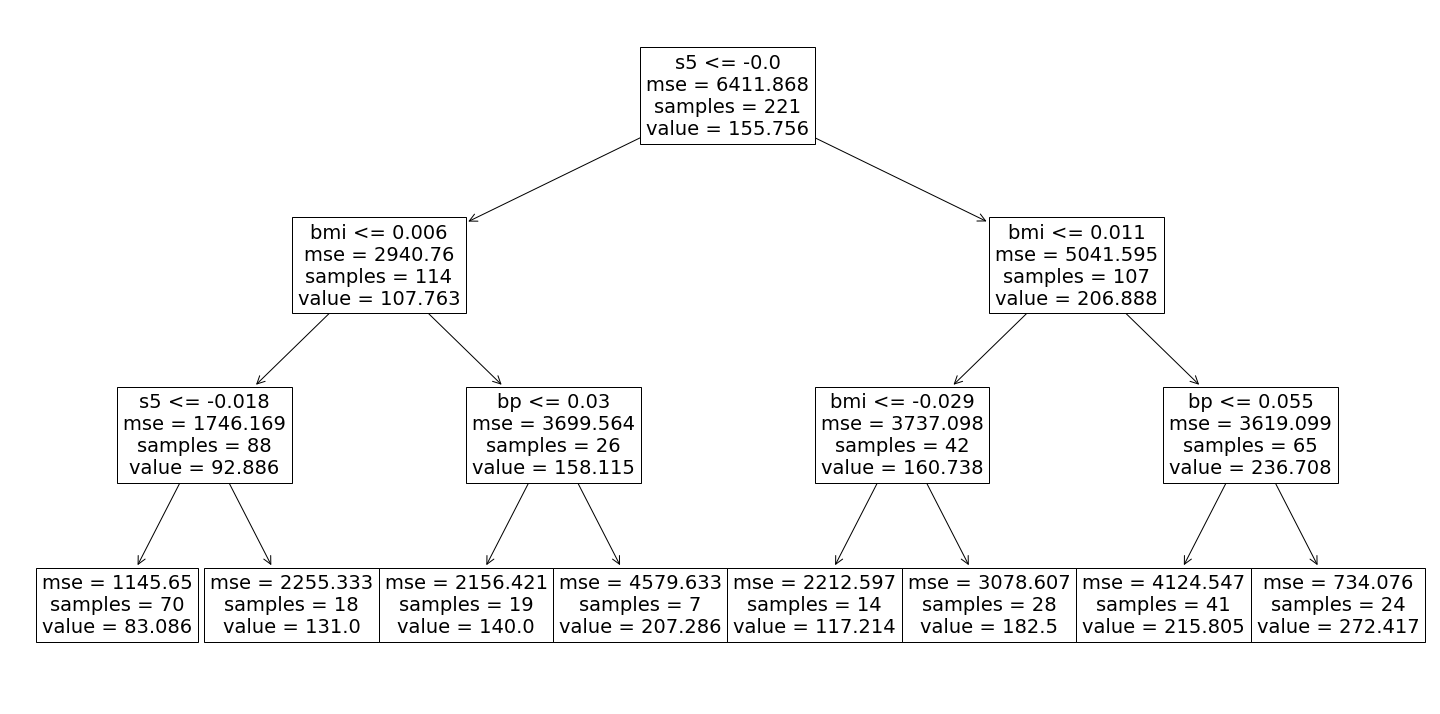

In [5]:
# utilizzo il modello che ho visto performare meglio
tree_model = DecisionTreeRegressor(max_depth=3,random_state=1)
tree_model.fit(x_train, y_train)

plt.figure(figsize=(25,12.5))
plot_tree(tree_model, feature_names=dataset.feature_names)
plt.show()

## California Housing

Per valutare meglio il funzionamento dei due modelli, ho deciso di provare ad utilizzarli anche con un dataset più corposo

In [6]:
from sklearn.datasets import fetch_california_housing

dataset = fetch_california_housing()

x_train, x_test, y_train, y_test = train_test_split(dataset.data, dataset.target, random_state=1,train_size=0.5)

display(pd.DataFrame(data=x_train,columns=dataset.feature_names).head())

tree_model = DecisionTreeRegressor(random_state=1)
ridge_model = make_pipeline(Ridge(alpha=1.0,))

tree_model.fit(x_train, y_train)
ridge_model.fit(x_train, y_train)
tree_score = tree_model.score(x_test, y_test)
ridge_score = ridge_model.score(x_test, y_test)

print("tree score: {}\nridge score: {}\ntree depth: {}".format(tree_score, ridge_score, tree_model.get_depth()))

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,4.0893,35.0,5.267760,0.983607,1056.0,2.885246,33.94,-117.97
1,3.7578,24.0,5.061538,0.957692,781.0,3.003846,36.80,-119.73
2,2.4306,39.0,4.899209,1.069170,1990.0,3.932806,37.34,-121.87
3,3.2813,10.0,6.030928,1.159794,537.0,2.768041,39.16,-121.00
4,4.0950,36.0,5.407166,0.980456,1225.0,3.990228,34.24,-118.44


tree score: 0.6116263964416815
ridge score: 0.607876516297496
tree depth: 35


Con questo dataset i due modelli hanno score paragonabili. Da notare che ho utilizzato la regressione lineare invece che polinomiale, in quanto quella polinomiale dava risultati peggiori

Ho provato anche in questo caso a vedere come variava il punteggio del regression tree al variare di `max_depth`

In [7]:
results = []
for max_depth in range(1,20): 
  tree_model = DecisionTreeRegressor(max_depth=max_depth,random_state=1)
  tree_model.fit(x_train, y_train)
  score = tree_model.score(x_test, y_test)
  results.append([max_depth, score])
display(pd.DataFrame(data=results, columns=["max_depth", "score"]))

,max_depth,score
0,1,0.306330
1,2,0.445661
2,3,0.525649
3,4,0.574703
4,5,0.625710
5,6,0.656316
6,7,0.684897
7,8,0.692667
8,9,0.687293
9,10,0.680050


Dai dati si può vedere che con `max_depth=7` si ottiene il risultato migliore, il quale supera decisamente il risultato ottenuto dalla regressione lineare

Visualizzare un albero di altezza 7 risulta più difficile, e generare un'immagine di dimensioni sufficienti può richiedere qualche momento

In [8]:
tree_model = DecisionTreeRegressor(max_depth=7,random_state=1)
tree_model.fit(x_train, y_train)

plt.figure(figsize=(200,100))
plot_tree(tree_model, feature_names=dataset.feature_names)
plt.show()

## Osservazioni finali

* Sul dataset ridotto, Ridge ottiene risultati migliori rispetto al decision tree, mentre sul dataset più corposo prevale il regression tree. Questo potrebbe essere dovuto ai diversi dati oppure alla dimensione del dataset
* Non impostando il valore di `max_depth` il regression tree tende ad avere problemi di overfit


Comunque è da notare il fatto che i risultati ottenuti potrebbero dipendere in maniera più o meno accentuata anche dalla divisione dei dati in training e validation set. Si dovrebbero probabilmente effettuare gli stessi calcoli con divisioni diverse per confermare tali risultati.